> I have met with but one or two persons in the course of my life who
> understood the art of Walking   
> \- Henry David Thoreau, [Walking](https://www.theatlantic.com/magazine/archive/1862/06/walking/304674/)

In [1]:
import numpy as np
from numpy import random

from matplotlib import animation, rc
import matplotlib.pyplot as plt

## Magic to make animation work

In [2]:
rc('animation', html='html5')

In [3]:
def get_point():
    """Gets random point on unit circle"""
    angle = random.random() * 2 * np.pi
    return np.cos(angle), np.sin(angle)

In [4]:
def get_random_walk(num_steps):
    locations = np.zeros((2, num_steps))
    for i in range(1, num_steps):
        next_x, next_y = get_point()
        locations[0, i] = locations[0, i-1] + next_x
        locations[1, i] = locations[1, i-1] + next_y
    return locations

In [14]:
%%capture
NUM_STEPS = 50
data = get_random_walk(10**6)
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal", autoscale_on=False, xlim=(-10, 10), ylim=(-10, 10))
first, = plt.plot([], [], 'ro', alpha=0.2)
# second, = plt.plot([], [], 'ro', alpha=0.6)
third, = plt.plot([], [], 'ro', alpha=1.0)

loc_text = ax.text(0.02, 0.95, "", transform=ax.transAxes)
distance_text = ax.text(0.02, 0.90, "", transform=ax.transAxes)

def init():
    first.set_data([], [])
    #second.set_data([], [])
    third.set_data([], [])
    loc_text.set_text("")
    distance_text.set_text("")
    return first, third, loc_text, distance_text

def update_line(num):
    loc = data[..., num]
    first.set_data(data[..., :num])
        
    third.set_data(loc)
    loc_text.set_text(f"Location = ({loc[0]:0.2f}, {loc[1]:0.2f})")
    distance_text.set_text(f"Distance from origin = {np.linalg.norm(loc):0.2f}")
    return first, third, loc_text, distance_text

walk = animation.FuncAnimation(fig, update_line, NUM_STEPS, interval=500, repeat_delay=3000)

In [15]:
walk

In [7]:
import seaborn as sns
import pandas as pd

In [8]:
walk_data = get_random_walk(10**5)
data = {
    "n": np.array([i for i in range(10**5)]),
    "x": walk_data[0],
    "y": walk_data[1],
    "dist": np.array([np.linalg.norm(walk_data[..., n]) for n in range(10**5)]),
}
data["dist_over_n"] = data["dist"] / (data["n"] + 1)
df = pd.DataFrame(data)

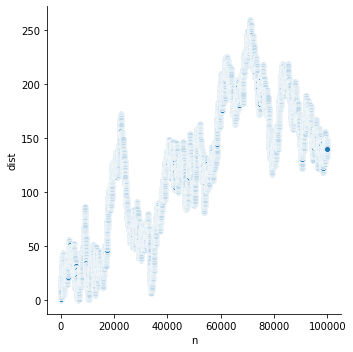

In [9]:
sns.relplot(x="n", y="dist", data=df)